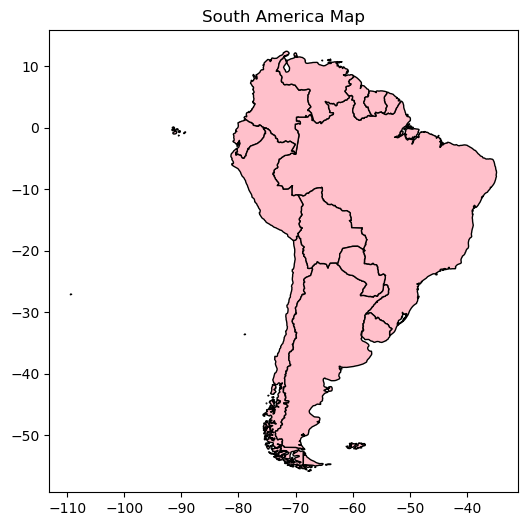

In [16]:
# !pip install geopandas contextily matplotlib pandas
# !pip install --upgrade contextily xyzservices
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx  

file_path = "south-america_652 (1).geojson"
southamerica = gpd.read_file(file_path)
# this will load South American GeoJson file using pandas 

# Plot the base map of South America
[fig, ax = plt.subplots(figsize=(10, 6))
southamerica.plot(ax=ax, edgecolor="black", color="pink")
plt.title("South America Map")
plt.show()

#This step helps us visualize the boundaries of South American countries before adding population data.


In [19]:
# Display first few rows to make it a bit easy to check
# since we are only focusing on population distrinution we filter the dataset to include only selected countries
southamerica.head()

,name,cartodb_id,created_at,updated_at,geometry
0,French Guiana (France),1,2013-11-28 06:32:17+01:00,2013-11-28 06:33:02+01:00,"POLYGON ((-52.28892 4.87612, -52.32461 4.7709,..."
1,Brazil,33,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-48.48589 -27.76699, -48.55459..."
2,Chile,41,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-67.5752 -55.88965, -67.61143 ..."
3,Argentina,9,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Bolivia,32,2013-11-27 20:16:22+01:00,2013-11-27 20:16:23+01:00,"POLYGON ((-58.15977 -20.16465, -58.13994 -19.9..."


In [17]:
selected_countries = ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"]
filtered_df = southamerica[southamerica["name"].isin(selected_countries)]


# Create population data and marge it with our geographical data
opulation_data = {
    "Country": ["Brazil", "Chile", "Argentina", "Uruguay", "Ecuador", "Colombia", "Peru", "Paraguay"],
    "Population": [213000000, 19000000, 45000000, 3500000, 17800000, 50800000, 33000000, 7100000]
}

population_df = pd.DataFrame(population_data)

merged_df = filtered_df.merge(population_df, left_on="name", right_on="Country")

# By merging population data with geographical boundaries, we can visualize population distributions effectively.


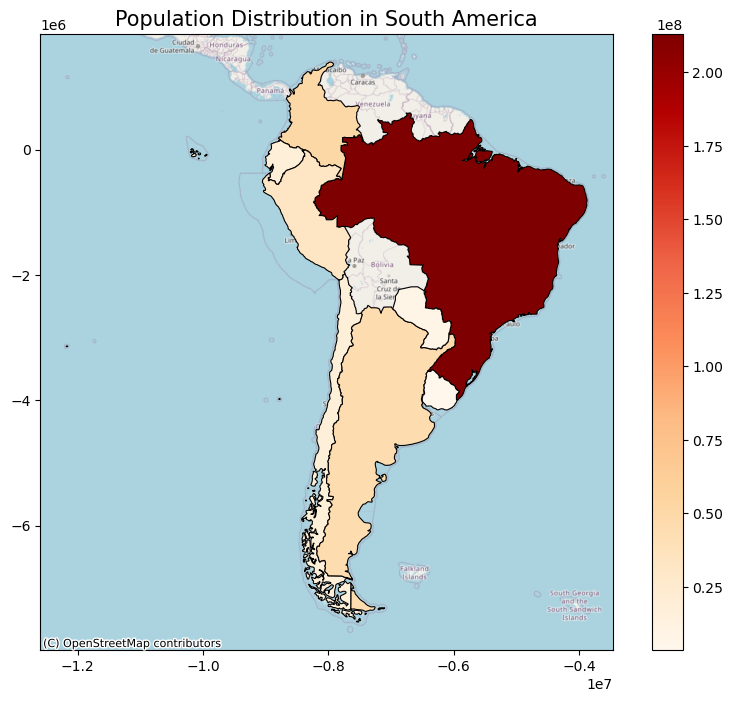

In [18]:

merged_df = merged_df.to_crs(epsg=3857)

# Plot Population Distribution Map and the plot choropleth map where the color intensity represent population map 
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="Population", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

ax.set_title("Population Distribution in South America", fontsize=15)


ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


plt.show()

# This step visualizes population distribution using color intensity and overlays it on a real-world map using OpenStreetMap.


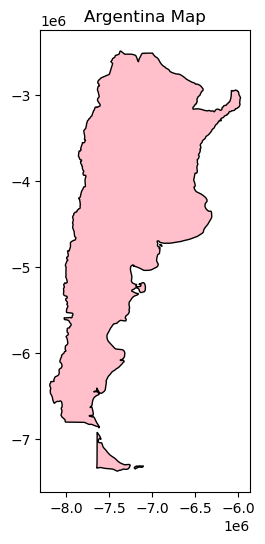

In [11]:
argentina = merged_df[merged_df['name'] == 'Argentina']

fig, ax = plt.subplots(figsize=(6, 6))
argentina.plot(ax=ax, color="pink", edgecolor="black")
ax.set_title("Argentina Map")
plt.show()

#This provides a focused view of Argentina’s & Brazil geographical boundaries.



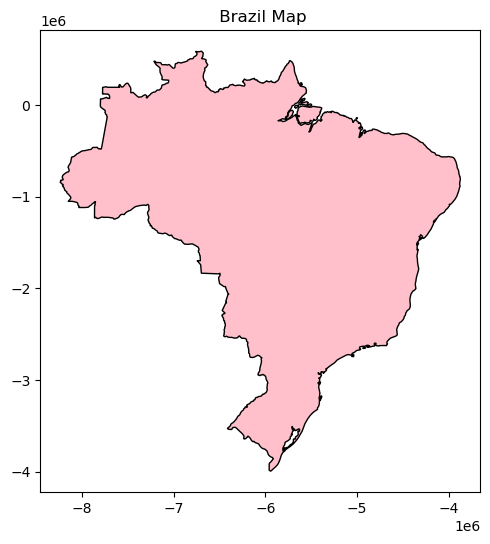

In [15]:
Brazil = merged_df[merged_df['name'] == 'Brazil']
fig, ax = plt.subplots(figsize=(6, 6))
Brazil.plot(ax=ax, color="pink", edgecolor="black")
ax.set_title(" Brazil Map")
plt.show()
#Brazil has the largest population, as seen by its dark red color, with over 213 million people.


In [ ]:
# overall this section  of our project effectively combines data science and geography to understand population trends in South America using Python and geospatial tools
